In [4]:
# %load main.py
   
import pandas as pd
import numpy as np
import lib.load as load
import data_cleaning as dc
import lib.df_info as i
import lib.func as f

df = load.load_data()
df_transactions = df[0]
#df_new_cust_list = df[1]
df_demographic = df[2]
df_address = df[3]

try:
    df_transactions = dc.clean_transactions(df_transactions).reset_index(drop=True)
    print('Success: transactions')
except Exception as e:
    print(f'Error transactions: {e}')

try:
    df_demographic = dc.clean_demographic(df_demographic).reset_index(drop=True)
    print('Success: demographic')
except Exception as e:
    print(f'Error demographic: {e}')

try:
    df_address = dc.clean_address(df_address).reset_index(drop=True)
    print('Success: address')
except Exception as e:
    print(f'Error address: {e}')
    
    

Success: transactions
Success: demographic
Success: address


<function matplotlib.pyplot.show(close=None, block=None)>

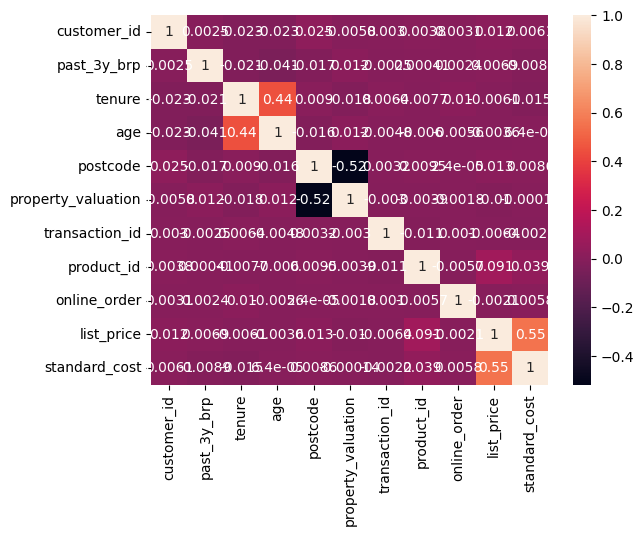

In [5]:
# HEATMAP CORRELATION
import seaborn as sns
import matplotlib.pyplot as plt

dff = f.merge_df_inner(df_demographic,df_transactions,df_address)
numeric_columns = dff.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_columns.corr(), annot=True)

plt.show

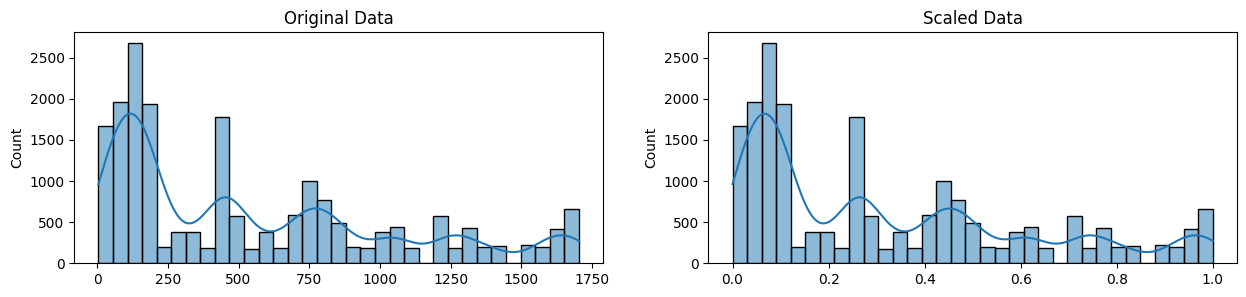

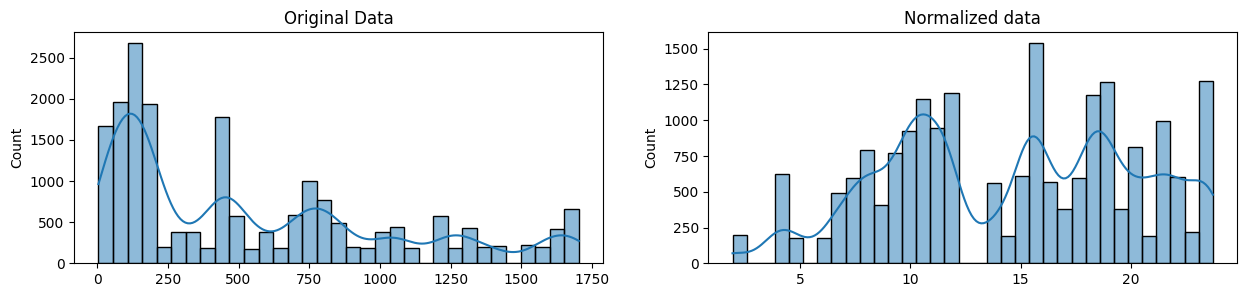

In [18]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
import lib.func as f

np.random.seed(0)

def norm_data(data):
    # normalize the exponential data with boxcox
    normalized_data = stats.boxcox(data)

    # plot both together to compare
    fig, ax=plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Normalized data")
    plt.show()

def scale_data(data):
    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scaling(data, columns=[0])

    # plot both together to compare
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled Data")
    plt.show()


listprice_data = df_transactions['list_price'].values
rev_data = (df_transactions['list_price'] - df_transactions['standard_cost']).values 

data = rev_data

scale_data(data)
norm_data(data)

